In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!unzip prml22-1.zip

Archive:  prml22-1.zip
  inflating: iris-test.csv           
  inflating: iris-train.csv          
  inflating: sample_submit.csv       


In [ ]:
train = pd.read_csv('iris-train.csv')
test = pd.read_csv('iris-test.csv')

In [ ]:
print(train.shape)

print(test.shape)

(105, 5)
(45, 4)


In [ ]:
train.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.5,4.2,1.4,0.2,setosa
1,5.4,3.4,1.7,0.2,setosa
2,6.4,3.2,5.3,2.3,virginica
3,6.7,3.3,5.7,2.1,virginica
4,5.0,3.2,1.2,0.2,setosa


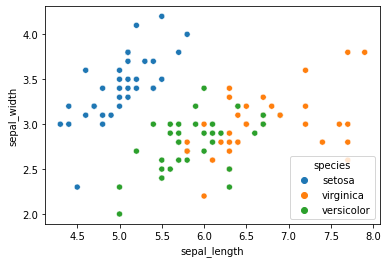

In [ ]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=train, hue='species')

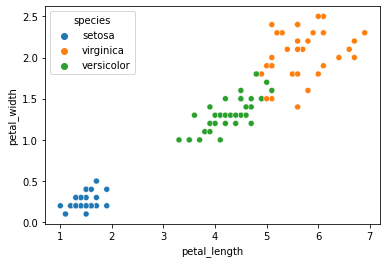

In [ ]:
sns.scatterplot(x='petal_length', y='petal_width', data=train, hue='species')


In [ ]:
# train_data 정답 드랍
X_data = train.drop(['species'],axis = 1) # input x를 정의
y_answer = train['species'] # 정답
y_answer


0          setosa
1          setosa
2       virginica
3       virginica
4          setosa
          ...    
100        setosa
101    versicolor
102        setosa
103        setosa
104        setosa
Name: species, Length: 105, dtype: object

# 실수화

In [ ]:
#데이터 실수화
from sklearn.preprocessing import LabelEncoder # 하나씩 하나씩 라벨 인코딩을 함
classle=LabelEncoder() #class label
#'species'열의 문자열을 categorical value로 전환
y=classle.fit_transform(y_answer.values) # 실수화
print('species labels:', np.unique(y,return_counts= True)) #중복되는 y값을 하나로 정리하여 출력


species labels: (array([0, 1, 2]), array([35, 35, 35]))


# 테스트 셋 분류

In [ ]:
from sklearn.model_selection import train_test_split

#X(독립 입력변수)와 y(종속변수)로 이루어진 데이터를 학습과 테스트 데이터넷으로 각각 70%, 30%의 비율로 나눔
# 램덤시드를 정해줌 
# stratify=y 균등하게 클래스를 배분
X_train,x_test,y_train,y_test=train_test_split(X_data,y, test_size=0.2, random_state=1, stratify=y)
print('입력변수(학습데이터)    : ',  X_train.shape)
print('입력변수(테스트데이터)  : ', x_test.shape)
print('종속변수(학습데이터)    : ',  y_train.shape)
print('종속변수(테스트데이터)  : ', y_test.shape)

입력변수(학습데이터)    :  (84, 4)
입력변수(테스트데이터)  :  (21, 4)
종속변수(학습데이터)    :  (84,)
종속변수(테스트데이터)  :  (21,)


(array([0, 1, 2]), array([7, 7, 7]))

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(store_covariance= True) # store_covariance 무엇인지 공분산의 값을 출력 할수 있다.

lda.fit(X_train, y_train)
y_train_pred = lda.predict(X_train)
y_test_pred = lda.predict(x_test)


# 차원축소

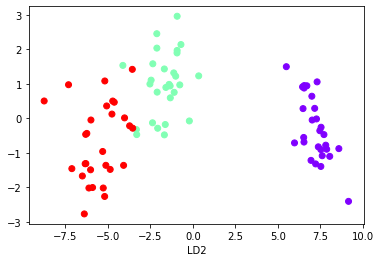

In [ ]:
x_lda = lda.fit_transform(X_train, y_train)
plt.ylabel('LD1')
plt.xlabel('LD2')
plt.scatter(x_lda[:,0], x_lda[:,1], c=y_train, cmap = 'rainbow')

# 평가

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9880952380952381
0.9047619047619048
